<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Dudas_Desafio_Evaluado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/Archivo.zip'

In [36]:
import glob 
import os
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
file_list=glob.glob(os.getcwd() + '/dump/*.csv')
file_list_2=glob.glob(os.getcwd() + '/dump_plus_pop/*.csv')


In [81]:
new_file_list=file_list

In [82]:
append_csv=[]
for fmin in new_file_list:
  append_csv.append(pd.read_csv(fmin, index_col=0,header=0))

In [83]:
df_lyric=pd.concat(append_csv)
df_lyric.columns=['artist','genre','song','lyrics']

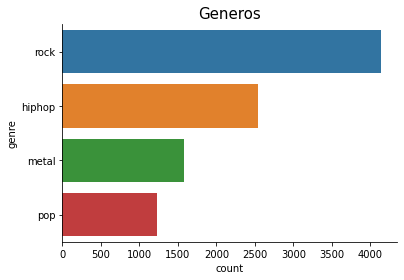

In [84]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.title('Generos', fontsize = 15)
sn.countplot(data = df_lyric, y = 'genre', order = df_lyric.genre.value_counts().index);
sn.despine()

In [113]:
count=CountVectorizer(stop_words='english',strip_accents = 'ascii', 
                                 max_df = 0.90, min_df = 0.05,
                                 max_features = 1000)

In [114]:
tranformed_feats=count.fit_transform(df_lyric['lyrics'].values)

In [115]:
from sklearn.decomposition import LatentDirichletAllocation

In [116]:
modelo=LatentDirichletAllocation(learning_method='online',n_components=5,learning_decay=0.7).fit(tranformed_feats)

In [117]:
modelo.perplexity(tranformed_feats)

166.998603739011

In [118]:
for topic_id,topic_name in enumerate(modelo.components_):
  print("topico: {}".format(topic_id*1))
  print(" ".join([count.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))

topico: 0
life away world time ll eyes god die death blood dead ve live day soul
topico: 1
like shit man yo got fuck nigga niggas bitch ain know don real ass em
topico: 2
yeah night tonight come little hey high let day fly song home bring ride light
topico: 3
love oh don know baby want just ll ve got gonna let wanna say make
topico: 4
like just don got know cause ain ya right say make em good better gotta


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [119]:
import numpy as np
fit_modelo= modelo.transform(tranformed_feats)

topics_for_each_doc = pd.DataFrame(
   np.round(fit_modelo, 3),
   index=df_lyric.index
)
topics_for_each_doc.columns = list(map(lambda x: "topico: {}".format(x), range(1, modelo.n_components + 1)))
concatenated_df = pd.concat([df_lyric, topics_for_each_doc], axis=1)
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values,axis=1)*1

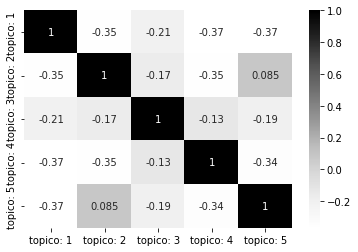

In [120]:
sn.heatmap(concatenated_df.loc[:,'topico: 1':'topico: 5'].corr(), annot=True,cmap='Greys')

In [121]:
def fetch_mixture (df,artist):
  return df[df['artist']==artist].loc[:,'topico: 1':'topico: 5']

In [122]:
fetch_mixture(concatenated_df,'Metallica')

,topico: 1,topico: 2,topico: 3,topico: 4,topico: 5
0,0.134,0.262,0.104,0.150,0.349
1,0.446,0.003,0.347,0.200,0.003
2,0.720,0.005,0.005,0.005,0.265
3,0.488,0.006,0.297,0.203,0.006
4,0.200,0.200,0.200,0.200,0.200
...,...,...,...,...,...
150,0.511,0.170,0.249,0.005,0.066
151,0.267,0.006,0.714,0.006,0.006
152,0.383,0.002,0.174,0.439,0.002
153,0.411,0.461,0.057,0.005,0.066


In [123]:
concatenated_df.iloc[np.where(concatenated_df.artist=='Metallica')].groupby(['highest_topic']).count()

,artist,genre,song,lyrics,topico: 1,topico: 2,topico: 3,topico: 4,topico: 5
highest_topic,,,,,,,,,
0,98,98,98,98,98,98,98,98,98
1,2,2,2,2,2,2,2,2,2
2,10,10,10,10,10,10,10,10,10
3,29,29,29,29,29,29,29,29,29
4,16,16,16,16,16,16,16,16,16


In [128]:
concatenated_df.groupby(['highest_topic','genre']).count()

artist  song  lyrics  topico: 1  topico: 2  topico: 3  \
highest_topic genre                                                           
0             hiphop     159   159     159        159        159        159   
              metal     1262  1262    1262       1262       1262       1262   
              pop        156   156     156        156        156        156   
              rock      1126  1126    1126       1126       1126       1126   
1             hiphop    1203  1203    1203       1203       1203       1203   
              metal       30    30      30         30         30         30   
              pop        114   114     114        114        114        114   
              rock       104   104     104        104        104        104   
2             hiphop      33    33      33         33         33         33   
              metal       33    33      33         33         33         33   
              pop         37    37      37         37         37         37   
              rock       526   526     526        526        526        526   
3             hiphop     234   234     234        234        234        234   
              metal      157   157     157        157        157        157   
              pop        647   647     647        647        647        647   
              rock      1658  1658    1658       1658       1658       1658   
4             hiphop     906   906     906        906        906        906   
              metal      100   100     100        100        100        100   
              pop        278   278     278        278        278        278   
              rock       726   726     726        726        726        726   

                      topico: 4  topico: 5  
highest_topic genre                         
0             hiphop        159        159  
              metal        1262       1262  
              pop           156        156  
              rock         1126       1126  
1             hiphop       1203       1203  
              metal          30         30  
              pop           114        114  
              rock          104        104  
2             hiphop         33         33  
              metal          33         33  
              pop            37         37  
              rock          526        526  
3             hiphop        234        234  
              metal         157        157  
              pop           647        647  
              rock         1658       1658  
4             hiphop        906        906  
              metal         100        100  
              pop           278        278  
              rock          726        726

In [129]:
result

,artist,genre,song,lyrics,topico: 1,topico: 2,topico: 3,topico: 4,topico: 5,highest_topic
0,Metallica,metal,Hit The Lights,"No life till leather, we're gonna kick some as...",0.134,0.262,0.104,0.150,0.349,4
1,Metallica,metal,The Four Horsemen,"By the last breath, the fourth winds blow \n B...",0.446,0.003,0.347,0.200,0.003,0
2,Metallica,metal,Motorbreath,"Living and dying, laughing and crying \n Once ...",0.720,0.005,0.005,0.005,0.265,0
3,Metallica,metal,Jump In The Fire,"Down in the depths of my fiery home, the summo...",0.488,0.006,0.297,0.203,0.006,0
4,Metallica,metal,(Anesthesia) Pulling Teeth,"Bass solo, take one",0.200,0.200,0.200,0.200,0.200,0
...,...,...,...,...,...,...,...,...,...,...
150,Metallica,metal,Spit Out The Bone,Come unto me and you will feel perfection \n C...,0.511,0.170,0.249,0.005,0.066,0
151,Metallica,metal,Lords Of Summer,Sight \n Pale riders into the night \n Gallopi...,0.267,0.006,0.714,0.006,0.006,2
152,Metallica,metal,Ronnie Rising Medley,"I don't wanna go \n Something tells me no, no,...",0.383,0.002,0.174,0.439,0.002,3
153,Metallica,metal,When A Blind Man Cries,If you're leaving close the door \n I'm not ex...,0.411,0.461,0.057,0.005,0.066,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

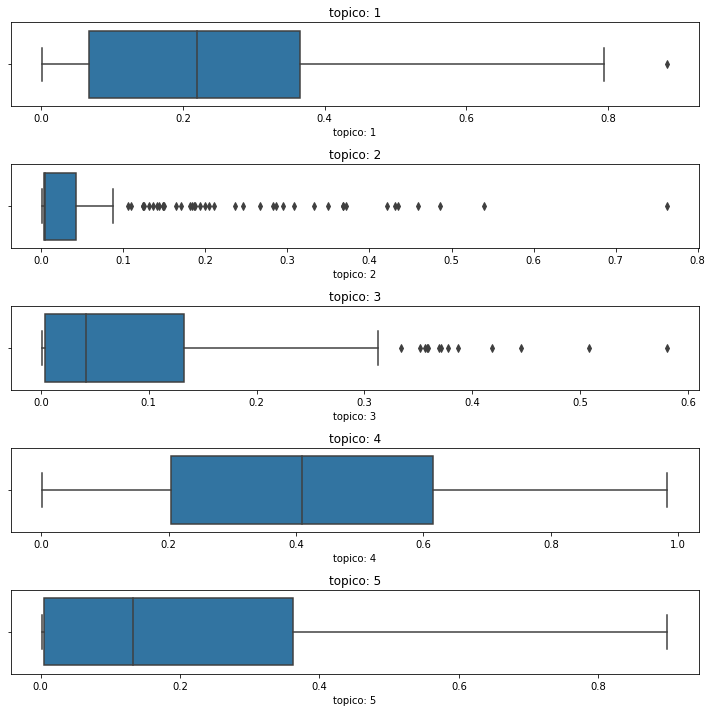

In [136]:
result=fetch_mixture(concatenated_df,'Red Hot Chili Peppers')
plt.figure(figsize=(10,10))
for index,(colname,serie) in enumerate(result.iteritems()):
  plt.subplot(5,1,index+1)
  sn.boxplot(serie,orient='h')
  plt.title(colname)
  plt.tight_layout()